<a href="https://colab.research.google.com/github/LJH3219/upload/blob/main/Class_07_dataset_preprocessing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'ooyyy'.count('y')

3

In [ ]:
a = ['BTS','IU','Blackpink','Twice']

for i in a:
  if i.endswith('e'):
    print(f'e로 끝나는 아이돌 {i}')

e로 끝나는 아이돌 Twice


In [ ]:
res = "_".join(a)
res

'BTS_IU_Blackpink_Twice'

In [ ]:
res.find('I'), res.rfind('B')

(4, 7)

In [ ]:
res.split('_')

['BTS', 'IU', 'Blackpink', 'Twice']

#### 데이터셋 중복 제거

In [ ]:
df = pd.DataFrame({'c1':['a', 'a', 'b', 'a', 'b'],
                  'c2':[1, 1, 1, 2, 2],
                  'c3':[1, 1, 2, 2, 2]})
print(df)
print('\n')

# 데이터프레임에서 중복 행을 제거
df2 = df.drop_duplicates()
print(df2)
print('\n')

# c2, c3열을 기준으로 중복 행을 제거
df3 = df.drop_duplicates(subset=['c2', 'c3'])
print(df3)


  c1  c2  c3
0  a   1   1
1  a   1   1
2  b   1   2
3  a   2   2
4  b   2   2


  c1  c2  c3
0  a   1   1
2  b   1   2
3  a   2   2
4  b   2   2


  c1  c2  c3
0  a   1   1
2  b   1   2
3  a   2   2


In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
for i in os.listdir('./drive/MyDrive'):
  print(i)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.path.exists('./sample_data/mnist_test.csv')

True

In [ ]:
os.path.basename('./drive/MyDrive'), os.path.dirname('./drive/MyDrive')

('MyDrive', './drive')

In [ ]:
os.path.join(os.path.dirname('./drive/MyDrive'), os.path.basename('./drive/MyDrive') )

'./drive/MyDrive'

In [ ]:
os.mkdir('./temp')

In [ ]:
os.rename('./sample_data/anscombe.json', './sample_data/temp.json')

In [ ]:
for curDir, dirs, files in os.walk(os.getcwd(), topdown=True):
  print(curDir, dirs, files)

/content ['.config', 'sample_data'] ['diabetes.csv']
/content/.config ['logs', 'configurations'] ['config_sentinel', 'gce', '.last_update_check.json', 'active_config', '.last_opt_in_prompt.yaml', '.last_survey_prompt.yaml']
/content/.config/logs ['2022.09.26'] []
/content/.config/logs/2022.09.26 [] ['13.44.51.979721.log', '13.44.20.618810.log', '13.45.15.211900.log', '13.43.53.411838.log', '13.45.16.034312.log', '13.44.43.065608.log']
/content/.config/configurations [] ['config_default']
/content/sample_data [] ['README.md', 'anscombe.json', 'california_housing_train.csv', 'mnist_train_small.csv', 'california_housing_test.csv', 'mnist_test.csv']


In [5]:
import pandas as pd
df = pd.read_csv('/content/diabetes.csv')
# df = pd.read_csv('/content/drive/MyDrive/diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df['Insulin'].value_counts(dropna=False)

0      374
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: Insulin, Length: 186, dtype: int64

#### 조건에 맞는 행 삭제하기

In [ ]:
index1 = df[df['Insulin'] == 0 ].index
print(index1)

Int64Index([  0,   1,   2,   5,   7,   9,  10,  11,  12,  15,
            ...
            754, 756, 757, 758, 759, 761, 762, 764, 766, 767],
           dtype='int64', length=374)


In [ ]:
df.drop(index1, inplace=True)

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


In [ ]:
df['Outcome'].value_counts(dropna=False)

0    264
1    130
Name: Outcome, dtype: int64

In [ ]:
df['Age_class'] = pd.cut(df['Age'], 3, labels=['child', 'young', 'old'])
df[['Age', 'Age_class']].head(10)

,Age,Age_class
3,21,child
4,33,child
6,26,child
8,53,young
13,59,young
14,51,young
16,31,child
18,33,child
19,32,child
20,27,child


In [ ]:
df['Age_class'].value_counts(dropna=False)

child    329
young     63
old        2
Name: Age_class, dtype: int64

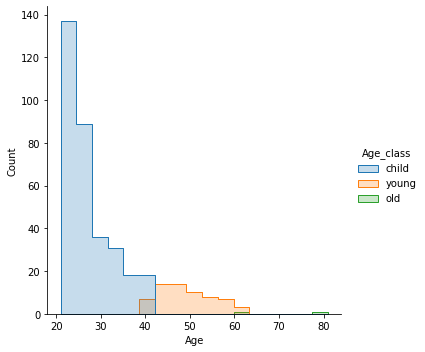

In [ ]:
import seaborn as sns
sns.displot(df, x='Age', hue='Age_class', element='step')

#### 동일한 개수로 나누기

In [ ]:
df['Age_class2'] = pd.qcut(df['Age'], 3, labels=['child', 'young', 'old'])

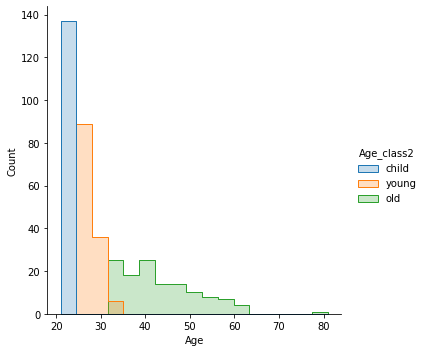

In [ ]:
sns.displot(df, x='Age', hue='Age_class2', element='step')

In [ ]:
df2 = pd.read_csv('/ChronicKidneyDisease_EHRs_from_AbuDhabi.csv')